###  Regresión y regresión

### Regresion Mensual
* Diferencia de mes 1
* Sin interpolacion
* Churn por mes


###  Escenarios a probar
* Cambiar la diferencia de mes
* Sumar Churn periodo referencia
 * Diferencia Churn
* Interpolar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
def hm_corr_graf(corr_matrix_V2, cat):
    aux=pd.pivot_table(corr_matrix_V2,columns=['variable_2'],index=['variable_1'],values=['r'])
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    sns.heatmap(
        aux,
        annot     = True,
        cbar      = False,
        annot_kws = {"size": 10},
        vmin      = -0.5,
        vmax      = 0.5,
        center    = 0,
        cmap      = sns.diverging_palette(20, 220, n=200),
        square    = True,
        ax        = ax
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation = 45,
        horizontalalignment = 'right',
    )
    ax.tick_params(labelsize = 10)
    ax.set_title(cat)

In [3]:
data= pd.read_csv('dataSetCompleto.csv',sep=',', header = 0)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (3,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
data_global=data.copy()

In [5]:
# EVITAR LECTURA
data=data_global.copy()

In [6]:
data['VOLUNTARIO'].value_counts()

-1    1422825
 0     225019
Name: VOLUNTARIO, dtype: int64

In [7]:
sel_variables_descrip=['CUENTA','FECHA','COD_NODO','INVOLUNTARIO', 'VOLUNTARIO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO','CHURN_TEMPRANO']
sel_variables_razones=['CONGELACION','VIAJES','CAPACIDAD_DE_PAGO','CAUSAS_EXTERNAS','COMPETENCIA','MAL_SERVICIO','NO_UTILIZAR',
                    'NO_GUSTO','SIN_MOTIVO','SIN_CONTACTO','TRASLADOS','OTROS','CAMBIO_DE_SERVICIO','CAMBIO_TARIFA','EMPAQUETAMIENTO',
                    'CESION_DE_CONTRATO','UNIFICACION_EMPAQUETAMIENTO','BAJAS_TOTAL']
sel_variables_causas2=['ALFA_tarifa','ALFA', 'BETA', 'Llamadas_Admin_3M', 'Llamadas_Tecn_3M', 'PROM_PRECIO']

In [8]:
data.columns

Index(['CUENTA', 'COD_SERVICIO', 'Velocidad', 'Internet', 'COD_NODO',
       'ESTRATO', 'CARTERA', 'CONGELACION', 'VIAJES', 'CAPACIDAD_DE_PAGO',
       'CAUSAS_EXTERNAS', 'COMPETENCIA', 'MAL_SERVICIO', 'NO_UTILIZAR',
       'NO_GUSTO', 'SIN_MOTIVO', 'SIN_CONTACTO', 'TRASLADOS', 'OTROS',
       'CD_BLANCOS_CAMBIOS_OTROS', 'CAMBIO_DE_SERVICIO', 'CAMBIO_TARIFA',
       'EMPAQUETAMIENTO', 'CESION_DE_CONTRATO', 'UNIFICACION_EMPAQUETAMIENTO',
       'CD_BLANCOS_CAMBIOS_SERVICIO', 'FECHA', 'CHURN_TEMPRANO',
       'INVOLUNTARIO', 'VOLUNTARIO', 'TIPO_RAZON', 'CANTIDAD_LLAMADAS',
       'CANTIDAD_ADMIN', 'CANTIDAD_TECNICO', 'CAMPANA_HBO', 'CAMPANA_FOX',
       'CAMPANA_ADULTO', 'CAMPANA_EQUIPOS_ADIC', 'CAMPANA_ULTRAWIFI',
       'CAMPANA_VOZ', 'CAMPANA_RETENCION', 'CAMPANA_AFECTACION_SRV',
       'PART_CANT_CALL', 'CANT_USER', 'PROM_VEL', 'VEL_ME_8', 'VEL_10_25',
       'VEL_30', 'VEL_40_50', 'VEL_MA_60', 'CONVERGENTE', 'PROM_VEL_HOGAR',
       'MEDIANA_VEL', 'PROM_RENTA', 'PRECIO_MEGA_CLARO_1'

In [9]:
data[sel_variables_razones]

,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,SIN_MOTIVO,SIN_CONTACTO,TRASLADOS,OTROS,CAMBIO_DE_SERVICIO,CAMBIO_TARIFA,EMPAQUETAMIENTO,CESION_DE_CONTRATO,UNIFICACION_EMPAQUETAMIENTO,BAJAS_TOTAL
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,-1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647839,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1647840,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1647841,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1647842,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,-1


In [10]:
data

,CUENTA,COD_SERVICIO,Velocidad,Internet,COD_NODO,ESTRATO,CARTERA,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,...,ZONA,CIUDAD,DISTRITO,BAJAS_TOTAL,comp_tarifa,operador_menor_tarifa,ALFA_tarifa,Llamadas_3M,Llamadas_Admin_3M,Llamadas_Tecn_3M
0,88384766,NB2,@,50,ZG2,3,0,0,0,0,...,MEDELLIN SUR,MEDELLIN,MEDELLIN SURORIENTAL,0,NaN,NINGUNO,NaN,2.0,2.0,0.0
1,92228220,DV3,NaN,60,HBP1,3,0,0,0,0,...,SABANA OCCIDENTE,MADRID,MADRID,-1,NaN,NINGUNO,NaN,5.0,2.0,3.0
2,48074413,5BA,NaN,5,PPA4D,3,0,0,0,0,...,CESAR,VALLEDUPAR,CESAR DISTRITO 1,0,NaN,NINGUNO,NaN,5.0,2.0,2.0
3,2139171,SUD,@,10,9BZ,2,0,0,0,0,...,BOSA,BOGOTA,ROMA,0,79900.0,AVG_TARIFA_ETB,0.895650,0.0,0.0,0.0
4,14885225,D3V,@,160,SNJ,4,0,0,0,0,...,BUCARAMANGA-METROPOLITANA,BUCARAMANGA,DISTRITO BGA 1,-1,112900.0,AVG_TARIFA_MOVISTAR,1.065949,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647839,44922987,BC4,@,45,MP1,6,0,0,0,0,...,BUCARAMANGA-METROPOLITANA,BUCARAMANGA,DISTRITO BGA 2,0,82900.0,AVG_TARIFA_MOVISTAR,0.691698,0.0,0.0,0.0
1647840,50148766,BC4,@,45,DY2,2,0,0,0,0,...,TOLIMA,IBAGUE,TOLIMA DISTRITO 3,0,112900.0,AVG_TARIFA_MOVISTAR,1.263231,0.0,0.0,0.0
1647841,68546699,R30,@,30,TCJ,2,-1,0,0,0,...,CALI SUR,JAMUNDI,CALI SUR DISTRITO 6,0,NaN,NINGUNO,NaN,0.0,0.0,0.0
1647842,10096355,R1R,@,15,IG2,3,0,0,0,0,...,MEDELLIN SUR,ITAGUI,METROPOLITANA ITAGUI,-1,NaN,NINGUNO,NaN,5.0,4.0,1.0


In [11]:
maestro_data=data[['COD_NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO']].drop_duplicates()

In [12]:
data['BAJAS_TOTAL'].sum()

-200411

In [13]:
data['PROM_PRECIO']=data['PROM_RENTA']/data['PROM_VEL_HOGAR']

In [14]:
data['PROM_PRECIO']

0          1044.000000
1          2071.826923
2          2043.260000
3          1311.897059
4          1260.892857
              ...     
1647839    2496.875000
1647840    1489.566667
1647841    2998.285714
1647842    2754.780488
1647843    1215.576923
Name: PROM_PRECIO, Length: 1647844, dtype: float64

### PLAN
*  Agrupacion por Nodos
    * Sumar Bajas
    * Max cantidad de Usuarios
    * Calcular Indice por Nodo
* Contar Nodo sin Nullos y Nodos con baja cantidad de usuarios
 * Participación de la data total


In [15]:
data=data[data['VOLUNTARIO']==-1]

In [16]:
for col in sel_variables_razones :
    data[col]=data[col]*-1

<ipython-input-16-bbfce4ced020>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col]=data[col]*-1


In [17]:
data=data[(data['BAJAS_TOTAL']>=1)&(data['BAJAS_TOTAL']<=2)]

In [18]:
data=data[(data['FECHA']>=1)&(data['FECHA']<=10)]

In [19]:
data_t=data.copy()

### Agrupacion Nodos

In [20]:
nodos_tab=data.groupby(['FECHA','COD_NODO'])[['CANT_USER']].min().reset_index()

In [21]:
nodos_tab

,FECHA,COD_NODO,CANT_USER
0,1,01S,159.0
1,1,03J,32.0
2,1,05J,63.0
3,1,0AR,299.0
4,1,0BZ,368.0
...,...,...,...
47389,10,ZS22,148.0
47390,10,ZSP,377.0
47391,10,ZSR,452.0
47392,10,ZT1,353.0


In [22]:
nodos_tab.nunique()

FECHA           10
COD_NODO     12956
CANT_USER      882
dtype: int64

In [23]:
nodos_tab['CANT_USER'].value_counts().describe()

count    882.000000
mean      53.070295
std       47.959447
min        1.000000
25%        6.000000
50%       38.000000
75%      103.000000
max      167.000000
Name: CANT_USER, dtype: float64

In [24]:
nodos_tab['CANT_USER'].value_counts().min()

1

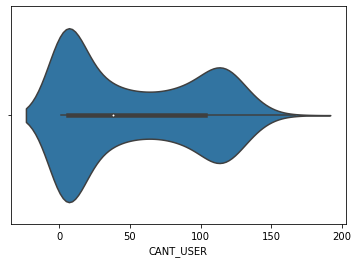

In [25]:
ax = sns.violinplot(x=nodos_tab['CANT_USER'].value_counts())

In [26]:
### Eliminar Nodos poco significativos

#####  Suma Bajas Nodo mes

In [27]:
nodos_tab_bajas=data.groupby(['FECHA','COD_NODO'])[sel_variables_razones].sum().reset_index()

In [28]:
nodos_tab_bajas

,FECHA,COD_NODO,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,SIN_MOTIVO,SIN_CONTACTO,TRASLADOS,OTROS,CAMBIO_DE_SERVICIO,CAMBIO_TARIFA,EMPAQUETAMIENTO,CESION_DE_CONTRATO,UNIFICACION_EMPAQUETAMIENTO,BAJAS_TOTAL
0,1,01S,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,03J,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2
2,1,05J,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,3
3,1,0AR,0,0,0,0,1,0,0,2,2,0,0,0,0,0,0,0,0,5
4,1,0BZ,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47389,10,ZS22,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,3
47390,10,ZSP,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,2
47391,10,ZSR,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
47392,10,ZT1,0,1,1,0,1,2,0,1,2,0,0,2,0,0,0,0,0,10


In [29]:
nodos_tab_bajas['BAJAS_TOTAL'].value_counts()

1     12165
2      9145
3      7226
4      5524
5      4014
6      2954
7      2007
8      1425
9       936
10      668
11      420
12      271
13      161
14      120
15       91
16       53
18       37
17       37
20       29
19       21
21       12
22       11
23       10
26        8
24        7
33        5
25        4
36        4
30        4
27        3
28        3
29        2
54        2
32        2
45        2
50        1
47        1
64        1
56        1
42        1
40        1
39        1
38        1
37        1
35        1
31        1
Name: BAJAS_TOTAL, dtype: int64

#####  Contar Meses por Nodos

In [30]:
nodos_tab['COD_NODO'].value_counts().to_frame().value_counts().sort_index()

COD_NODO
1           1609
2           1595
3           2606
4           3375
5           2422
6            817
7            238
8            109
9            123
10            62
dtype: int64

### Variables Adicionales

In [31]:
data_comp=data[['COD_NODO','FECHA']+sel_variables_causas2].groupby(['COD_NODO','FECHA']).mean()
data_comp.reset_index(inplace=True)
data_comp.sort_values(['COD_NODO','FECHA'],inplace=True)

In [32]:
data_comp

,COD_NODO,FECHA,ALFA_tarifa,ALFA,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
0,01S,1,NaN,0.420691,0.824528,3.00,0.00,2357.921053
1,01S,2,NaN,0.585591,1.455621,5.50,0.00,2212.463415
2,01S,5,1.209064,0.409383,1.217604,6.50,0.00,1125.036145
3,01S,6,0.863952,0.926171,1.390110,1.50,0.00,1005.239130
4,02S,6,1.270295,0.494729,0.750280,10.00,0.00,1326.522388
...,...,...,...,...,...,...,...,...
47389,ZVZ,6,NaN,1.146149,1.114969,5.25,0.75,1306.164706
47390,ZVZ,7,NaN,1.282257,1.279740,2.40,0.20,1094.841584
47391,ago-01,2,NaN,NaN,NaN,NaN,NaN,NaN
47392,ago-01,5,NaN,NaN,NaN,NaN,NaN,NaN


### Union Data Frames

In [33]:
Nodos_Final=nodos_tab.merge(nodos_tab_bajas, left_on=['COD_NODO','FECHA'], right_on=['COD_NODO','FECHA'])
Nodos_Final=Nodos_Final.merge(data_comp, left_on=['COD_NODO','FECHA'], right_on=['COD_NODO','FECHA'])
Nodos_Final

,FECHA,COD_NODO,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,...,EMPAQUETAMIENTO,CESION_DE_CONTRATO,UNIFICACION_EMPAQUETAMIENTO,BAJAS_TOTAL,ALFA_tarifa,ALFA,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
0,1,01S,159.0,0,0,0,0,0,1,0,...,0,0,0,1,NaN,0.420691,0.824528,3.0,0.000000,2357.921053
1,1,03J,32.0,0,0,0,0,0,1,1,...,0,0,0,2,NaN,NaN,1.483871,6.0,0.500000,2499.113636
2,1,05J,63.0,0,0,1,0,0,0,0,...,0,0,0,3,NaN,NaN,NaN,8.0,0.666667,2565.187500
3,1,0AR,299.0,0,0,0,0,1,0,0,...,0,0,0,5,1.284109,1.009542,1.308370,4.4,0.600000,3017.656250
4,1,0BZ,368.0,0,0,1,0,0,0,0,...,0,0,0,2,0.925304,0.673503,1.000778,3.5,1.000000,2616.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47389,10,ZS22,148.0,0,0,0,0,0,0,0,...,0,0,0,3,NaN,0.219796,1.355932,3.0,0.333333,1107.516129
47390,10,ZSP,377.0,0,0,0,0,0,1,0,...,0,0,0,2,NaN,0.174997,1.364964,4.5,0.500000,963.129310
47391,10,ZSR,452.0,0,0,1,0,0,0,0,...,0,0,0,2,NaN,1.534147,1.505338,1.5,0.000000,1033.924731
47392,10,ZT1,353.0,0,1,1,0,1,2,0,...,0,0,0,10,0.931264,1.502391,1.369979,2.8,0.600000,963.317757


In [34]:
#Nodos_Final.to_csv('FormatoNodo.csv')

In [35]:
Nodos_Final['Llamadas_Admin_3M']=Nodos_Final['Llamadas_Admin_3M']/Nodos_Final['CANT_USER']
Nodos_Final['Llamadas_Tecn_3M']=Nodos_Final['Llamadas_Tecn_3M']/Nodos_Final['CANT_USER']

<AxesSubplot:xlabel='Llamadas_Admin_3M', ylabel='Llamadas_Tecn_3M'>

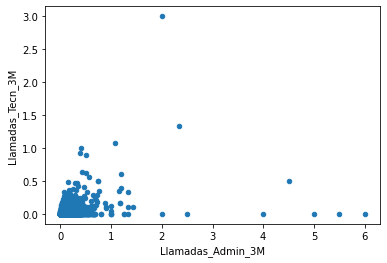

In [36]:
Nodos_Final[['Llamadas_Admin_3M','Llamadas_Tecn_3M']].plot(kind='scatter', x=0,y=1, )

In [37]:
df=Nodos_Final[['Llamadas_Admin_3M','Llamadas_Tecn_3M']]

In [38]:
df['Llamadas_Admin_3M']=np.log1p(df['Llamadas_Admin_3M'])

<ipython-input-38-1239d4d436df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Llamadas_Admin_3M']=np.log1p(df['Llamadas_Admin_3M'])


In [39]:
df['Llamadas_Tecn_3M']=np.log1p(df['Llamadas_Tecn_3M'])

<ipython-input-39-abad0ae6502e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Llamadas_Tecn_3M']=np.log1p(df['Llamadas_Tecn_3M'])


<AxesSubplot:xlabel='Llamadas_Admin_3M', ylabel='Llamadas_Tecn_3M'>

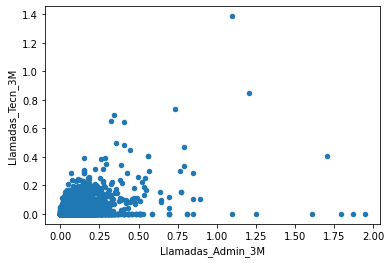

In [40]:
df[['Llamadas_Admin_3M','Llamadas_Tecn_3M']].plot(kind='scatter', x=0,y=1)

In [41]:
Nodos_Final.columns

Index(['FECHA', 'COD_NODO', 'CANT_USER', 'CONGELACION', 'VIAJES',
       'CAPACIDAD_DE_PAGO', 'CAUSAS_EXTERNAS', 'COMPETENCIA', 'MAL_SERVICIO',
       'NO_UTILIZAR', 'NO_GUSTO', 'SIN_MOTIVO', 'SIN_CONTACTO', 'TRASLADOS',
       'OTROS', 'CAMBIO_DE_SERVICIO', 'CAMBIO_TARIFA', 'EMPAQUETAMIENTO',
       'CESION_DE_CONTRATO', 'UNIFICACION_EMPAQUETAMIENTO', 'BAJAS_TOTAL',
       'ALFA_tarifa', 'ALFA', 'BETA', 'Llamadas_Admin_3M', 'Llamadas_Tecn_3M',
       'PROM_PRECIO'],
      dtype='object')

In [42]:
Nodos_Final['ind_churn']=np.where(Nodos_Final['CANT_USER']>0,Nodos_Final['BAJAS_TOTAL']/Nodos_Final['CANT_USER'],np.nan)

In [43]:
Nodos_Final['ind_churn'].describe()

count    46808.000000
mean         0.017867
std          0.018625
min          0.001355
25%          0.009404
50%          0.014493
75%          0.021898
max          1.000000
Name: ind_churn, dtype: float64

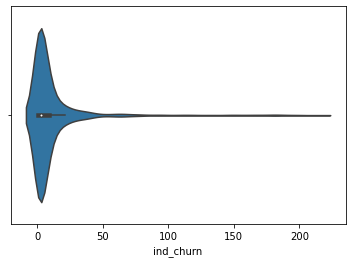

In [44]:
ax = sns.violinplot(x=Nodos_Final['ind_churn'].value_counts())

### Seleccion de Nodos

*  Nodos con pocos ususarios quantile
*  Nodos con pocos meses <10
*  Nodos con indice bajos y atipicos
*  Nodos sin información varibles adicionales

<AxesSubplot:xlabel='FECHA'>

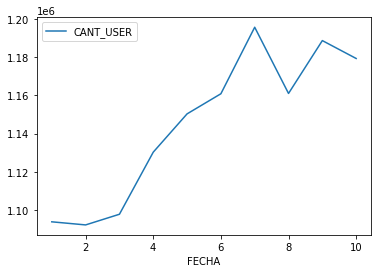

In [45]:
Nodos_Final[['FECHA','CANT_USER']].groupby('FECHA').sum().plot()

In [46]:
Nodos_Final[['FECHA','CANT_USER']].groupby('FECHA').sum()

,CANT_USER
FECHA,
1,1093783.0
2,1092160.0
3,1097743.0
4,1130242.0
5,1150279.0
6,1160815.0
7,1195628.0
8,1160972.0
9,1188641.0


<AxesSubplot:xlabel='FECHA'>

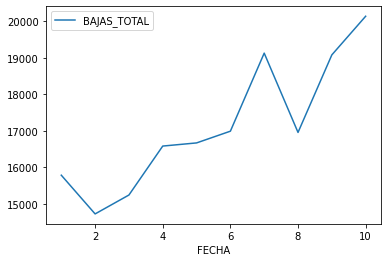

In [47]:
Nodos_Final[['FECHA','BAJAS_TOTAL']].groupby('FECHA').sum().plot()

In [48]:
Nodos_Final['COD_NODO'].nunique()

12956

In [49]:
Nodos_Final[['FECHA','BAJAS_TOTAL']].groupby('FECHA').sum()

,BAJAS_TOTAL
FECHA,
1,15787
2,14728
3,15245
4,16584
5,16670
6,16991
7,19126
8,16957
9,19078


In [50]:
resumen=Nodos_Final[['FECHA','CANT_USER']].groupby('FECHA').sum().merge(Nodos_Final[['FECHA','BAJAS_TOTAL']].groupby('FECHA').sum(), left_index=True, right_index=True)

<AxesSubplot:xlabel='FECHA'>

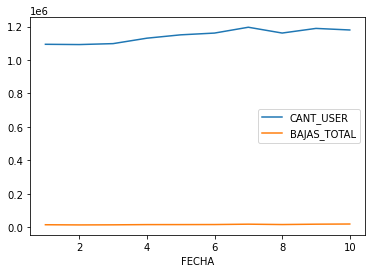

In [51]:
resumen.plot()

In [52]:
# Numero registros
print('Nodos: ',Nodos_Final['COD_NODO'].nunique(), ' Registros (nodosxmes): ', len(Nodos_Final))

Nodos:  12956  Registros (nodosxmes):  47394


In [53]:
Nodos_Final['CANT_USER'].isnull().sum()

586

In [54]:
Nodos_Final['CANT_USER'].describe()

count    46808.000000
mean       244.606478
std        152.916674
min          1.000000
25%        122.000000
50%        225.000000
75%        337.000000
max       1360.000000
Name: CANT_USER, dtype: float64

In [55]:
len(Nodos_Final)

47394

In [56]:
#Nodos_Final.groupby('COD_NODO')[''].
len(Nodos_Final[Nodos_Final['CANT_USER']<=30])

871

In [57]:
Nodos_Final

,FECHA,COD_NODO,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,...,CESION_DE_CONTRATO,UNIFICACION_EMPAQUETAMIENTO,BAJAS_TOTAL,ALFA_tarifa,ALFA,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO,ind_churn
0,1,01S,159.0,0,0,0,0,0,1,0,...,0,0,1,NaN,0.420691,0.824528,0.018868,0.000000,2357.921053,0.006289
1,1,03J,32.0,0,0,0,0,0,1,1,...,0,0,2,NaN,NaN,1.483871,0.187500,0.015625,2499.113636,0.062500
2,1,05J,63.0,0,0,1,0,0,0,0,...,0,0,3,NaN,NaN,NaN,0.126984,0.010582,2565.187500,0.047619
3,1,0AR,299.0,0,0,0,0,1,0,0,...,0,0,5,1.284109,1.009542,1.308370,0.014716,0.002007,3017.656250,0.016722
4,1,0BZ,368.0,0,0,1,0,0,0,0,...,0,0,2,0.925304,0.673503,1.000778,0.009511,0.002717,2616.666667,0.005435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47389,10,ZS22,148.0,0,0,0,0,0,0,0,...,0,0,3,NaN,0.219796,1.355932,0.020270,0.002252,1107.516129,0.020270
47390,10,ZSP,377.0,0,0,0,0,0,1,0,...,0,0,2,NaN,0.174997,1.364964,0.011936,0.001326,963.129310,0.005305
47391,10,ZSR,452.0,0,0,1,0,0,0,0,...,0,0,2,NaN,1.534147,1.505338,0.003319,0.000000,1033.924731,0.004425
47392,10,ZT1,353.0,0,1,1,0,1,2,0,...,0,0,10,0.931264,1.502391,1.369979,0.007932,0.001700,963.317757,0.028329


In [58]:
Nodos_Final_fil=Nodos_Final[Nodos_Final['CANT_USER']>30]

In [59]:
print('Nodos: ',Nodos_Final_fil['COD_NODO'].nunique(), ' Registros (nodosxmes): ', len(Nodos_Final_fil))

Nodos:  12057  Registros (nodosxmes):  45937


In [60]:
Nodos_Final_fil['COD_NODO'].value_counts().to_frame().value_counts().sort_index()

COD_NODO
1           1034
2           1406
3           2528
4           3338
5           2411
6            812
7            238
8            109
9            120
10            61
dtype: int64

In [61]:
Nodos_Final_fil=Nodos_Final_fil.merge(Nodos_Final_fil['COD_NODO'].value_counts().to_frame(), left_on='COD_NODO', right_index=True, how='left')

In [62]:
Nodos_Final_fil=Nodos_Final_fil[Nodos_Final_fil['COD_NODO_y']==10]

In [63]:
Nodos_Final_fil.rename(columns={'COD_NODO_x':'COD_NODO','COD_NODO_y':'nMeses'},inplace=True)

In [64]:
print('Nodos: ',Nodos_Final_fil['COD_NODO'].nunique(), ' Registros (nodosxmes): ', len(Nodos_Final_fil))

Nodos:  61  Registros (nodosxmes):  610


In [65]:
Nodos_Final_fil[['COD_NODO','FECHA']+sel_variables_causas2].isnull().sum()/len(Nodos_Final_fil)

COD_NODO             0.000000
FECHA                0.000000
ALFA_tarifa          0.314754
ALFA                 0.114754
BETA                 0.013115
Llamadas_Admin_3M    0.000000
Llamadas_Tecn_3M     0.000000
PROM_PRECIO          0.000000
dtype: float64

In [66]:
### Val interpolacion

In [67]:
Nodos_Final_fil.sort_values(['COD_NODO','FECHA'])

,FECHA,COD_NODO,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,...,UNIFICACION_EMPAQUETAMIENTO,BAJAS_TOTAL,ALFA_tarifa,ALFA,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO,ind_churn,nMeses
55,1,15B2,412.0,1,0,0,0,0,0,1,...,0,4,0.702134,0.938404,0.767620,0.009102,0.001214,2275.920000,0.009709,10
4645,2,15B2,417.0,0,1,1,0,0,0,0,...,0,3,0.703853,0.535036,0.840322,0.013589,0.011990,2270.360000,0.007194,10
9188,3,15B2,416.0,1,0,1,0,0,0,1,...,0,3,NaN,0.748191,0.500241,0.012821,0.002404,2209.294118,0.007212,10
13698,4,15B2,418.0,2,1,0,0,0,2,0,...,0,6,0.710418,0.801659,0.952036,0.007974,0.003987,1479.855263,0.014354,10
18379,5,15B2,420.0,0,0,0,0,0,2,0,...,0,4,0.993829,0.724961,1.097072,0.008333,0.001190,1456.423077,0.009524,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27627,6,VRR,521.0,0,0,2,0,1,1,0,...,0,8,NaN,0.859250,0.955240,0.004079,0.001679,2446.200000,0.015355,10
32578,7,VRR,531.0,1,0,0,0,0,0,0,...,0,5,NaN,0.580991,0.957609,0.004896,0.000753,1590.396226,0.009416,10
37298,8,VRR,532.0,0,0,3,0,0,0,0,...,0,5,NaN,0.685725,1.735614,0.004887,0.000376,1324.032258,0.009398,10
42287,9,VRR,524.0,0,0,3,0,0,2,0,...,0,9,NaN,1.023693,1.373391,0.006361,0.001484,1314.312500,0.017176,10


In [68]:
data_comp=Nodos_Final_fil[['COD_NODO','FECHA']+sel_variables_causas2].groupby(['COD_NODO','FECHA']).mean()
data_comp.reset_index(inplace=True)
data_comp.sort_values(['COD_NODO','FECHA'],inplace=True)
data_comp_pt=pd.pivot_table(data_comp,index='FECHA',columns='COD_NODO')

In [69]:
### Listar Nodos a eliminar por falta de información si le falta más de 2 datos en cada serie

In [70]:
list_eliminar=[]
i=0
for col in sel_variables_causas2:
    print(col)
    df_aux=data_comp_pt[col].isnull().sum().to_frame()
    df_aux=df_aux[df_aux[0]>2]
    if i==0:
        list_eliminar=list(df_aux.index)
    else :
        list_eliminar=list_eliminar+list(df_aux.index)
    i=i+1
list_eliminar = list(set(list_eliminar))

ALFA_tarifa
ALFA
BETA
Llamadas_Admin_3M
Llamadas_Tecn_3M
PROM_PRECIO


In [71]:
len(list_eliminar)

10

In [72]:
data_comp_pt=data_comp_pt.interpolate()
data_comp_pt.reset_index(inplace=True)
data_comp_un=data_comp_pt.melt(id_vars=['FECHA'], var_name=['varible','COD_NODO'],value_name='valor')
data_comp=pd.pivot_table(data_comp_un,index=['COD_NODO','FECHA'],columns='varible')
data_comp.columns = data_comp.columns.droplevel()
data_comp.reset_index(inplace=True)

In [73]:
data_comp

varible,COD_NODO,FECHA,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
0,15B2,1,0.938404,0.702134,0.767620,0.009102,0.001214,2275.920000
1,15B2,2,0.535036,0.703853,0.840322,0.013589,0.011990,2270.360000
2,15B2,3,0.748191,0.707136,0.500241,0.012821,0.002404,2209.294118
3,15B2,4,0.801659,0.710418,0.952036,0.007974,0.003987,1479.855263
4,15B2,5,0.724961,0.993829,1.097072,0.008333,0.001190,1456.423077
...,...,...,...,...,...,...,...,...
605,VRR,6,0.859250,NaN,0.955240,0.004079,0.001679,2446.200000
606,VRR,7,0.580991,NaN,0.957609,0.004896,0.000753,1590.396226
607,VRR,8,0.685725,NaN,1.735614,0.004887,0.000376,1324.032258
608,VRR,9,1.023693,NaN,1.373391,0.006361,0.001484,1314.312500


In [74]:
Nodos_Final_fil=Nodos_Final_fil.drop(columns=sel_variables_causas2).merge(data_comp,left_on=['COD_NODO','FECHA'],right_on=['COD_NODO','FECHA'])

In [75]:
Nodos_Final_fil

,FECHA,COD_NODO,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,...,UNIFICACION_EMPAQUETAMIENTO,BAJAS_TOTAL,ind_churn,nMeses,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
0,1,15B2,412.0,1,0,0,0,0,0,1,...,0,4,0.009709,10,0.938404,0.702134,0.767620,0.009102,0.001214,2275.920000
1,1,2A4013,87.0,0,1,0,0,0,0,0,...,0,2,0.022989,10,0.633621,NaN,0.777778,0.057471,0.000000,1983.259740
2,1,2EZ,394.0,1,0,1,0,0,0,0,...,0,6,0.015228,10,0.807352,1.285379,0.912913,0.013959,0.002538,2833.354839
3,1,2HR,327.0,0,0,1,0,0,0,0,...,0,7,0.021407,10,0.633076,1.089772,0.743100,0.025775,0.002184,2931.382353
4,1,35C1,129.0,1,0,0,0,1,0,1,...,0,4,0.031008,10,2.261007,1.024836,1.384615,0.017442,0.007752,2078.566038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,10,UT1,249.0,0,0,1,0,0,0,0,...,0,2,0.008032,10,2.508574,0.925551,1.890034,0.012048,0.000000,991.128440
606,10,UV1,208.0,0,0,0,0,0,0,0,...,0,2,0.009615,10,0.647835,0.837017,1.546019,0.007212,0.002404,1086.000000
607,10,VDP,346.0,2,1,2,0,0,2,1,...,0,11,0.031792,10,1.863720,0.845481,1.226415,0.006831,0.001314,1046.173077
608,10,VLL1,295.0,0,0,0,0,0,0,0,...,0,2,0.006780,10,0.844117,1.112657,1.538265,0.005085,0.003390,1361.606061


In [76]:
### Eliminar Nodos con mayor imputaciones
Nodos_Final_fil=Nodos_Final_fil[~Nodos_Final_fil['COD_NODO'].isin(list_eliminar)]

In [77]:
print('Nodos: ',Nodos_Final_fil['COD_NODO'].nunique(), ' Registros (nodosxmes): ', len(Nodos_Final_fil))

Nodos:  51  Registros (nodosxmes):  510


In [78]:
Nodos_Final_fil=Nodos_Final_fil.sort_values(['COD_NODO','FECHA'])

In [79]:
data.columns

Index(['CUENTA', 'COD_SERVICIO', 'Velocidad', 'Internet', 'COD_NODO',
       'ESTRATO', 'CARTERA', 'CONGELACION', 'VIAJES', 'CAPACIDAD_DE_PAGO',
       'CAUSAS_EXTERNAS', 'COMPETENCIA', 'MAL_SERVICIO', 'NO_UTILIZAR',
       'NO_GUSTO', 'SIN_MOTIVO', 'SIN_CONTACTO', 'TRASLADOS', 'OTROS',
       'CD_BLANCOS_CAMBIOS_OTROS', 'CAMBIO_DE_SERVICIO', 'CAMBIO_TARIFA',
       'EMPAQUETAMIENTO', 'CESION_DE_CONTRATO', 'UNIFICACION_EMPAQUETAMIENTO',
       'CD_BLANCOS_CAMBIOS_SERVICIO', 'FECHA', 'CHURN_TEMPRANO',
       'INVOLUNTARIO', 'VOLUNTARIO', 'TIPO_RAZON', 'CANTIDAD_LLAMADAS',
       'CANTIDAD_ADMIN', 'CANTIDAD_TECNICO', 'CAMPANA_HBO', 'CAMPANA_FOX',
       'CAMPANA_ADULTO', 'CAMPANA_EQUIPOS_ADIC', 'CAMPANA_ULTRAWIFI',
       'CAMPANA_VOZ', 'CAMPANA_RETENCION', 'CAMPANA_AFECTACION_SRV',
       'PART_CANT_CALL', 'CANT_USER', 'PROM_VEL', 'VEL_ME_8', 'VEL_10_25',
       'VEL_30', 'VEL_40_50', 'VEL_MA_60', 'CONVERGENTE', 'PROM_VEL_HOGAR',
       'MEDIANA_VEL', 'PROM_RENTA', 'PRECIO_MEGA_CLARO_1'

### Nodos Críticos

In [80]:
Nodos_Final_fil['ind_churn'].describe()

count    510.000000
mean       0.015108
std        0.008890
min        0.001524
25%        0.009220
50%        0.013637
75%        0.018605
max        0.070815
Name: ind_churn, dtype: float64

In [81]:
data=Nodos_Final_fil.copy()

###  Fin Agrupacion Nodos

# PROCESAMIENTO DATOS

# Configuración 0
* Sin diferencia variables explicativas

In [82]:
data_c0=data

## out

In [83]:
data_c0v2=data_c0.copy()

In [84]:
data_c0v2['ALFA_val']=np.where(data_c0v2['ALFA']>5.512517,1,0)
data_c0v2['BETA_val']=np.where(data_c0v2['BETA']>3.880706,1,0)

In [85]:
res=data_c0v2.groupby('COD_NODO')['ALFA_val','BETA_val'].sum()

<ipython-input-85-18fa785d57d4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res=data_c0v2.groupby('COD_NODO')['ALFA_val','BETA_val'].sum()


In [86]:
res['val_t']=np.where(res['ALFA_val']+res['BETA_val']>=1,1,0)

In [87]:
res

,ALFA_val,BETA_val,val_t
COD_NODO,,,
15B2,0,0,0
2EZ,0,0,0
2HR,0,0,0
35C1,0,0,0
4OL,0,0,0
52B,1,0,1
55,2,1,1
8A1012,0,0,0
AL3,0,0,0


In [88]:
res.sum()

ALFA_val    9
BETA_val    9
val_t       9
dtype: int64

In [89]:
data_c0v2['COD_NODO'].nunique()

51

In [90]:
len(res[res['val_t']>0].index)

9

In [91]:
data_c0v2[data_c0v2['COD_NODO'].isin(res[res['val_t']>0].index)].groupby('FECHA').sum()

,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,SIN_MOTIVO,...,ind_churn,nMeses,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO,ALFA_val,BETA_val
FECHA,,,,,,,,,,,,,,,,,,,,,
1,2826.0,7,3,2,0,0,2,3,1,24,...,0.137439,90,16.463535,7.962628,11.230302,0.182431,0.016830,23699.655985,0,0
2,2856.0,7,3,8,0,1,2,4,2,19,...,0.168943,90,16.697496,8.227698,12.556542,0.200605,0.011870,22276.875142,1,0
3,2867.0,7,1,7,0,3,3,3,2,14,...,0.128296,90,12.525965,7.701774,13.028548,0.150682,0.014237,21423.030223,0,1
4,2895.0,6,0,3,0,5,1,2,1,13,...,0.111270,90,21.167826,8.688324,12.431460,0.140029,0.006509,20557.664265,2,0
5,2950.0,5,4,6,0,2,5,1,2,17,...,0.148931,90,21.538396,8.873271,18.495822,0.111312,0.013849,15579.728160,1,1
6,2963.0,4,2,5,0,2,7,3,1,28,...,0.161280,90,10.192706,8.251801,13.609266,0.149652,0.021279,13757.274050,0,0
7,2970.0,3,1,8,0,0,4,1,0,29,...,0.156295,90,23.609171,7.880833,21.412108,0.141026,0.028544,12100.682176,2,2
8,2972.0,1,4,10,0,3,7,1,4,30,...,0.181259,90,20.844057,8.768040,22.394484,0.110025,0.015200,11456.799737,1,3
9,2975.0,5,4,5,0,1,6,6,1,38,...,0.229608,90,23.075836,7.880883,18.447383,0.114949,0.008652,11444.096539,1,2


In [92]:
data_c0_bak=data_c0.copy()

In [93]:
data_c0=data_c0v2[data_c0v2['COD_NODO'].isin(res[res['val_t']==0].index)]

In [94]:
data_c0.nunique()

FECHA                           10
COD_NODO                        42
CANT_USER                      242
CONGELACION                      5
VIAJES                           4
CAPACIDAD_DE_PAGO                6
CAUSAS_EXTERNAS                  1
COMPETENCIA                      4
MAL_SERVICIO                     6
NO_UTILIZAR                      4
NO_GUSTO                         4
SIN_MOTIVO                      13
SIN_CONTACTO                     1
TRASLADOS                        1
OTROS                            3
CAMBIO_DE_SERVICIO               1
CAMBIO_TARIFA                    1
EMPAQUETAMIENTO                  1
CESION_DE_CONTRATO               1
UNIFICACION_EMPAQUETAMIENTO      1
BAJAS_TOTAL                     20
ind_churn                      363
nMeses                           1
ALFA                           407
ALFA_tarifa                    289
BETA                           420
Llamadas_Admin_3M              408
Llamadas_Tecn_3M               295
PROM_PRECIO         

In [95]:
#data_c0['ALFA']=np.where(data_c0['ALFA']>5.512517)

In [96]:
data_c0v2[data_c0v2['COD_NODO'].isin(res[res['val_t']>0].index)].groupby('FECHA').sum()

,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,SIN_MOTIVO,...,ind_churn,nMeses,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO,ALFA_val,BETA_val
FECHA,,,,,,,,,,,,,,,,,,,,,
1,2826.0,7,3,2,0,0,2,3,1,24,...,0.137439,90,16.463535,7.962628,11.230302,0.182431,0.016830,23699.655985,0,0
2,2856.0,7,3,8,0,1,2,4,2,19,...,0.168943,90,16.697496,8.227698,12.556542,0.200605,0.011870,22276.875142,1,0
3,2867.0,7,1,7,0,3,3,3,2,14,...,0.128296,90,12.525965,7.701774,13.028548,0.150682,0.014237,21423.030223,0,1
4,2895.0,6,0,3,0,5,1,2,1,13,...,0.111270,90,21.167826,8.688324,12.431460,0.140029,0.006509,20557.664265,2,0
5,2950.0,5,4,6,0,2,5,1,2,17,...,0.148931,90,21.538396,8.873271,18.495822,0.111312,0.013849,15579.728160,1,1
6,2963.0,4,2,5,0,2,7,3,1,28,...,0.161280,90,10.192706,8.251801,13.609266,0.149652,0.021279,13757.274050,0,0
7,2970.0,3,1,8,0,0,4,1,0,29,...,0.156295,90,23.609171,7.880833,21.412108,0.141026,0.028544,12100.682176,2,2
8,2972.0,1,4,10,0,3,7,1,4,30,...,0.181259,90,20.844057,8.768040,22.394484,0.110025,0.015200,11456.799737,1,3
9,2975.0,5,4,5,0,1,6,6,1,38,...,0.229608,90,23.075836,7.880883,18.447383,0.114949,0.008652,11444.096539,1,2


In [97]:
data_c0[sel_variables_causas2].describe()

,ALFA_tarifa,ALFA,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
count,290.000000,410.000000,420.000000,420.000000,420.000000,420.000000
mean,0.983960,1.167449,1.198459,0.013461,0.002191,1877.926843
std,0.184200,0.907540,0.479163,0.009656,0.002957,620.484167
min,0.582922,0.001549,0.273106,0.001524,0.000000,886.461538
25%,0.869200,0.530155,0.881546,0.007345,0.000000,1272.320061
50%,0.972750,0.884789,1.091173,0.011314,0.001312,1982.456293
75%,1.103789,1.540968,1.421835,0.015670,0.002943,2370.238859
max,1.461829,5.029436,3.444444,0.080460,0.024911,3376.461538


In [98]:
data_c0v2

,FECHA,COD_NODO,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,...,ind_churn,nMeses,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO,ALFA_val,BETA_val
0,1,15B2,412.0,1,0,0,0,0,0,1,...,0.009709,10,0.938404,0.702134,0.767620,0.009102,0.001214,2275.920000,0,0
61,2,15B2,417.0,0,1,1,0,0,0,0,...,0.007194,10,0.535036,0.703853,0.840322,0.013589,0.011990,2270.360000,0,0
122,3,15B2,416.0,1,0,1,0,0,0,1,...,0.007212,10,0.748191,0.707136,0.500241,0.012821,0.002404,2209.294118,0,0
183,4,15B2,418.0,2,1,0,0,0,2,0,...,0.014354,10,0.801659,0.710418,0.952036,0.007974,0.003987,1479.855263,0,0
244,5,15B2,420.0,0,0,0,0,0,2,0,...,0.009524,10,0.724961,0.993829,1.097072,0.008333,0.001190,1456.423077,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,6,VRR,521.0,0,0,2,0,1,1,0,...,0.015355,10,0.859250,NaN,0.955240,0.004079,0.001679,2446.200000,0,0
426,7,VRR,531.0,1,0,0,0,0,0,0,...,0.009416,10,0.580991,NaN,0.957609,0.004896,0.000753,1590.396226,0,0
487,8,VRR,532.0,0,0,3,0,0,0,0,...,0.009398,10,0.685725,NaN,1.735614,0.004887,0.000376,1324.032258,0,0
548,9,VRR,524.0,0,0,3,0,0,2,0,...,0.017176,10,1.023693,NaN,1.373391,0.006361,0.001484,1314.312500,0,0


In [99]:
data_c0[sel_variables_causas2].quantile(0.99)

ALFA_tarifa             1.437772
ALFA                    4.314025
BETA                    2.751100
Llamadas_Admin_3M       0.050119
Llamadas_Tecn_3M        0.013278
PROM_PRECIO          3188.456478
Name: 0.99, dtype: float64

In [100]:
data_c0[sel_variables_causas2].quantile(0.99).to_frame()

,0.99
ALFA_tarifa,1.437772
ALFA,4.314025
BETA,2.751100
Llamadas_Admin_3M,0.050119
Llamadas_Tecn_3M,0.013278
PROM_PRECIO,3188.456478


In [101]:
data_c0.isnull().sum()

FECHA                            0
COD_NODO                         0
CANT_USER                        0
CONGELACION                      0
VIAJES                           0
CAPACIDAD_DE_PAGO                0
CAUSAS_EXTERNAS                  0
COMPETENCIA                      0
MAL_SERVICIO                     0
NO_UTILIZAR                      0
NO_GUSTO                         0
SIN_MOTIVO                       0
SIN_CONTACTO                     0
TRASLADOS                        0
OTROS                            0
CAMBIO_DE_SERVICIO               0
CAMBIO_TARIFA                    0
EMPAQUETAMIENTO                  0
CESION_DE_CONTRATO               0
UNIFICACION_EMPAQUETAMIENTO      0
BAJAS_TOTAL                      0
ind_churn                        0
nMeses                           0
ALFA                            10
ALFA_tarifa                    130
BETA                             0
Llamadas_Admin_3M                0
Llamadas_Tecn_3M                 0
PROM_PRECIO         

In [102]:
len(data_c0)

420

In [103]:
len(data_c0[data_c0['ALFA']>10])

0

In [104]:
len(data_c0[data_c0['ALFA']>10])/len(data_c0)

0.0

In [105]:
data_c0[['FECHA','CANT_USER']].groupby('FECHA').sum()

,CANT_USER
FECHA,
1,14269.0
2,14306.0
3,14396.0
4,14654.0
5,14884.0
6,14901.0
7,14894.0
8,14965.0
9,15058.0


In [106]:
Nodos_Final[['FECHA','CANT_USER']].groupby('FECHA').sum()

,CANT_USER
FECHA,
1,1093783.0
2,1092160.0
3,1097743.0
4,1130242.0
5,1150279.0
6,1160815.0
7,1195628.0
8,1160972.0
9,1188641.0


In [107]:
1532737/2608639

0.5875619432202003

In [108]:
data_c0[['FECHA','BAJAS_TOTAL']].groupby('FECHA').sum()

,BAJAS_TOTAL
FECHA,
1,200
2,197
3,164
4,174
5,162
6,208
7,229
8,240
9,247


In [109]:
Nodos_Final[['FECHA','BAJAS_TOTAL']].groupby('FECHA').sum()

,BAJAS_TOTAL
FECHA,
1,15787
2,14728
3,15245
4,16584
5,16670
6,16991
7,19126
8,16957
9,19078


In [110]:
26013/44988

0.5782208588957055

## Configuración 1

In [111]:
data_c1=data.copy()

In [112]:
for col in sel_variables_causas2:    
    data_c1[col]=data_c1.groupby('COD_NODO')[col].diff(1)

In [113]:
data_c1.columns

Index(['FECHA', 'COD_NODO', 'CANT_USER', 'CONGELACION', 'VIAJES',
       'CAPACIDAD_DE_PAGO', 'CAUSAS_EXTERNAS', 'COMPETENCIA', 'MAL_SERVICIO',
       'NO_UTILIZAR', 'NO_GUSTO', 'SIN_MOTIVO', 'SIN_CONTACTO', 'TRASLADOS',
       'OTROS', 'CAMBIO_DE_SERVICIO', 'CAMBIO_TARIFA', 'EMPAQUETAMIENTO',
       'CESION_DE_CONTRATO', 'UNIFICACION_EMPAQUETAMIENTO', 'BAJAS_TOTAL',
       'ind_churn', 'nMeses', 'ALFA', 'ALFA_tarifa', 'BETA',
       'Llamadas_Admin_3M', 'Llamadas_Tecn_3M', 'PROM_PRECIO'],
      dtype='object')

In [114]:
data_c1

,FECHA,COD_NODO,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,...,UNIFICACION_EMPAQUETAMIENTO,BAJAS_TOTAL,ind_churn,nMeses,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
0,1,15B2,412.0,1,0,0,0,0,0,1,...,0,4,0.009709,10,NaN,NaN,NaN,NaN,NaN,NaN
61,2,15B2,417.0,0,1,1,0,0,0,0,...,0,3,0.007194,10,-0.403368,0.001719,0.072701,0.004487,0.010777,-5.560000
122,3,15B2,416.0,1,0,1,0,0,0,1,...,0,3,0.007212,10,0.213155,0.003282,-0.340081,-0.000769,-0.009587,-61.065882
183,4,15B2,418.0,2,1,0,0,0,2,0,...,0,6,0.014354,10,0.053468,0.003282,0.451795,-0.004846,0.001583,-729.438854
244,5,15B2,420.0,0,0,0,0,0,2,0,...,0,4,0.009524,10,-0.076698,0.283411,0.145036,0.000359,-0.002797,-23.432186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,6,VRR,521.0,0,0,2,0,1,1,0,...,0,8,0.015355,10,0.854376,NaN,-0.180515,-0.004010,-0.000159,-140.103030
426,7,VRR,531.0,1,0,0,0,0,0,0,...,0,5,0.009416,10,-0.278259,NaN,0.002369,0.000818,-0.000926,-855.803774
487,8,VRR,532.0,0,0,3,0,0,0,0,...,0,5,0.009398,10,0.104734,NaN,0.778005,-0.000009,-0.000377,-266.363968
548,9,VRR,524.0,0,0,3,0,0,2,0,...,0,9,0.017176,10,0.337969,NaN,-0.362224,0.001474,0.001108,-9.719758


### Configuración 2
* Diferencial de Churn

In [115]:
data_c2=data.copy()

In [116]:
for col in sel_variables_causas2:    
    data_c2[col]=data_c2.groupby('COD_NODO')[col].diff(1)

In [117]:
for col in sel_variables_razones:    
    data_c2[col]=data_c2.groupby('COD_NODO')[col].diff(1)

###  Configuración 3
* Original ene - oct para validar

In [118]:
data_ene=data[data['FECHA']==1]
data_oct=data[data['FECHA']==10]
data_ene=data_ene[['COD_NODO']+sel_variables_causas2].groupby('COD_NODO').mean()
data_oct=data_oct[['COD_NODO']+sel_variables_causas2].groupby('COD_NODO').mean()
data_comp=data_ene.merge(data_oct,left_index=True, right_index=True, how='inner')

for col in data_ene.columns:
    data_comp[col]=data_comp[col+'_y']-data_comp[col+'_x']

data_comp=data_comp[data_ene.columns]
data_razones=data[['COD_NODO','ind_churn']+sel_variables_razones].groupby('COD_NODO').sum()
data_c3=data_razones.merge(data_comp, left_index=True, right_index=True)

In [119]:
data_c3

,ind_churn,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,SIN_MOTIVO,...,EMPAQUETAMIENTO,CESION_DE_CONTRATO,UNIFICACION_EMPAQUETAMIENTO,BAJAS_TOTAL,ALFA_tarifa,ALFA,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
COD_NODO,,,,,,,,,,,,,,,,,,,,,
15B2,0.117080,6,2,5,0,2,9,5,4,16,...,0,0,0,49,0.143775,1.018655,1.438440,0.001095,-0.000563,-1274.259286
2EZ,0.114150,3,3,8,0,0,2,3,1,27,...,0,0,0,48,-0.241308,1.923362,0.698598,-0.004414,0.000754,-1787.210260
2HR,0.111277,2,1,5,0,2,3,1,2,22,...,0,0,0,39,-0.061830,0.777846,0.041924,-0.014639,0.000120,-1024.088235
35C1,0.291328,3,0,4,0,4,7,5,0,12,...,0,0,0,35,-0.109034,-2.120428,0.035572,0.001077,0.006137,-1048.537736
4OL,0.082701,4,1,7,0,2,4,0,2,7,...,0,0,0,29,-0.163434,-0.274343,0.142608,-0.004323,-0.001497,-1837.110534
52B,0.185468,16,6,12,0,6,14,5,4,44,...,0,0,0,107,-0.111476,-1.194599,-0.353188,-0.001338,0.002955,-964.862794
55,0.162824,6,5,5,0,0,8,3,0,18,...,0,0,0,48,NaN,NaN,NaN,-0.003424,0.000004,-1407.122780
8A1012,0.188043,9,1,3,0,4,6,0,1,18,...,0,0,0,42,-0.072242,0.494525,-0.132462,0.002356,-0.006466,-1180.254802
AL3,0.181566,7,3,6,0,1,14,1,3,31,...,0,0,0,67,-0.102155,0.178849,1.205959,0.000576,-0.002095,-1212.462692


### Configuracion 4
* Nodos Críticos
* Configuración 2

In [120]:
data['ind_churn'].describe()

count    510.000000
mean       0.015108
std        0.008890
min        0.001524
25%        0.009220
50%        0.013637
75%        0.018605
max        0.070815
Name: ind_churn, dtype: float64

In [121]:
data

,FECHA,COD_NODO,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,...,UNIFICACION_EMPAQUETAMIENTO,BAJAS_TOTAL,ind_churn,nMeses,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
0,1,15B2,412.0,1,0,0,0,0,0,1,...,0,4,0.009709,10,0.938404,0.702134,0.767620,0.009102,0.001214,2275.920000
61,2,15B2,417.0,0,1,1,0,0,0,0,...,0,3,0.007194,10,0.535036,0.703853,0.840322,0.013589,0.011990,2270.360000
122,3,15B2,416.0,1,0,1,0,0,0,1,...,0,3,0.007212,10,0.748191,0.707136,0.500241,0.012821,0.002404,2209.294118
183,4,15B2,418.0,2,1,0,0,0,2,0,...,0,6,0.014354,10,0.801659,0.710418,0.952036,0.007974,0.003987,1479.855263
244,5,15B2,420.0,0,0,0,0,0,2,0,...,0,4,0.009524,10,0.724961,0.993829,1.097072,0.008333,0.001190,1456.423077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,6,VRR,521.0,0,0,2,0,1,1,0,...,0,8,0.015355,10,0.859250,NaN,0.955240,0.004079,0.001679,2446.200000
426,7,VRR,531.0,1,0,0,0,0,0,0,...,0,5,0.009416,10,0.580991,NaN,0.957609,0.004896,0.000753,1590.396226
487,8,VRR,532.0,0,0,3,0,0,0,0,...,0,5,0.009398,10,0.685725,NaN,1.735614,0.004887,0.000376,1324.032258
548,9,VRR,524.0,0,0,3,0,0,2,0,...,0,9,0.017176,10,1.023693,NaN,1.373391,0.006361,0.001484,1314.312500


In [122]:
data['COD_NODO'].nunique()

51

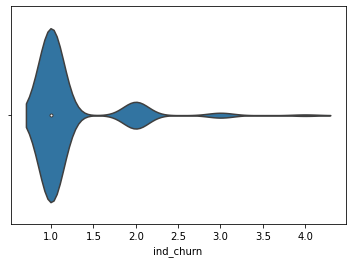

In [123]:
ax = sns.violinplot(x=data['ind_churn'].value_counts())

In [124]:
data_c4=data.copy()

In [125]:
corte=data_c4['ind_churn'].quantile(0.95)
corte=0.018

In [126]:
data_c4['sele>corte']=np.where(data_c4['ind_churn']>corte,1,0)

In [127]:
data_c4.groupby('COD_NODO')['sele>corte'].sum().to_frame().value_counts()

sele>corte
0             11
2              9
3              8
4              6
1              5
5              5
6              4
7              2
9              1
dtype: int64

In [128]:
res=data_c4.groupby('COD_NODO')['sele>corte'].sum().to_frame()
res[res['sele>corte']==2]

,sele>corte
COD_NODO,
B55,2
BCH1,2
BMM,2
COS,2
GUZ,2
L2F,2
L2G1,2
SUL,2
VLL1,2


In [129]:
#Nodos a eliminar
nodos_eliminar=res[res['sele>corte']==0].index

In [130]:
data_c4=data_c4[~data_c4['COD_NODO'].isin(nodos_eliminar)]

In [131]:
print('Nodos: ',data_c4['COD_NODO'].nunique(), ' Registros (nodosxmes): ', len(data_c4))

Nodos:  40  Registros (nodosxmes):  400


In [132]:
data_c4

,FECHA,COD_NODO,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,...,BAJAS_TOTAL,ind_churn,nMeses,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO,sele>corte
0,1,15B2,412.0,1,0,0,0,0,0,1,...,4,0.009709,10,0.938404,0.702134,0.767620,0.009102,0.001214,2275.920000,0
61,2,15B2,417.0,0,1,1,0,0,0,0,...,3,0.007194,10,0.535036,0.703853,0.840322,0.013589,0.011990,2270.360000,0
122,3,15B2,416.0,1,0,1,0,0,0,1,...,3,0.007212,10,0.748191,0.707136,0.500241,0.012821,0.002404,2209.294118,0
183,4,15B2,418.0,2,1,0,0,0,2,0,...,6,0.014354,10,0.801659,0.710418,0.952036,0.007974,0.003987,1479.855263,0
244,5,15B2,420.0,0,0,0,0,0,2,0,...,4,0.009524,10,0.724961,0.993829,1.097072,0.008333,0.001190,1456.423077,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,6,VLL1,284.0,0,0,0,0,0,0,0,...,1,0.003521,10,0.641857,1.104044,0.621005,0.003521,0.000000,2771.062500,0
425,7,VLL1,285.0,0,0,0,0,0,0,0,...,3,0.010526,10,0.698468,1.268112,1.067961,0.004678,0.001170,1648.703704,0
486,8,VLL1,290.0,0,0,1,0,0,1,0,...,4,0.013793,10,0.846581,1.159058,1.296167,0.011207,0.000862,1431.919355,0
547,9,VLL1,290.0,1,1,1,0,0,0,0,...,6,0.020690,10,0.981423,1.041131,1.667752,0.009770,0.003448,1416.578125,1


In [133]:
data_c4[data_c4['COD_NODO']=='0EG']

,FECHA,COD_NODO,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,...,BAJAS_TOTAL,ind_churn,nMeses,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO,sele>corte


In [134]:
data_c4.sum()

FECHA                                                                       2200
COD_NODO                       15B215B215B215B215B215B215B215B215B215B22HR2HR...
CANT_USER                                                               126429.0
CONGELACION                                                                  179
VIAJES                                                                        94
CAPACIDAD_DE_PAGO                                                            250
CAUSAS_EXTERNAS                                                                0
COMPETENCIA                                                                   95
MAL_SERVICIO                                                                 215
NO_UTILIZAR                                                                  116
NO_GUSTO                                                                      65
SIN_MOTIVO                                                                  1012
SIN_CONTACTO                

In [135]:
data_c5=data_c4.copy()

In [136]:
for col in sel_variables_causas2:    
    data_c5[col]=data_c5.groupby('COD_NODO')[col].diff(1)

In [137]:
print('Nodos: ',data_c4['COD_NODO'].nunique(), ' Registros (nodosxmes): ', len(data_c4))

Nodos:  40  Registros (nodosxmes):  400


In [138]:
data_c4

,FECHA,COD_NODO,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,...,BAJAS_TOTAL,ind_churn,nMeses,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO,sele>corte
0,1,15B2,412.0,1,0,0,0,0,0,1,...,4,0.009709,10,0.938404,0.702134,0.767620,0.009102,0.001214,2275.920000,0
61,2,15B2,417.0,0,1,1,0,0,0,0,...,3,0.007194,10,0.535036,0.703853,0.840322,0.013589,0.011990,2270.360000,0
122,3,15B2,416.0,1,0,1,0,0,0,1,...,3,0.007212,10,0.748191,0.707136,0.500241,0.012821,0.002404,2209.294118,0
183,4,15B2,418.0,2,1,0,0,0,2,0,...,6,0.014354,10,0.801659,0.710418,0.952036,0.007974,0.003987,1479.855263,0
244,5,15B2,420.0,0,0,0,0,0,2,0,...,4,0.009524,10,0.724961,0.993829,1.097072,0.008333,0.001190,1456.423077,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,6,VLL1,284.0,0,0,0,0,0,0,0,...,1,0.003521,10,0.641857,1.104044,0.621005,0.003521,0.000000,2771.062500,0
425,7,VLL1,285.0,0,0,0,0,0,0,0,...,3,0.010526,10,0.698468,1.268112,1.067961,0.004678,0.001170,1648.703704,0
486,8,VLL1,290.0,0,0,1,0,0,1,0,...,4,0.013793,10,0.846581,1.159058,1.296167,0.011207,0.000862,1431.919355,0
547,9,VLL1,290.0,1,1,1,0,0,0,0,...,6,0.020690,10,0.981423,1.041131,1.667752,0.009770,0.003448,1416.578125,1


## CORRELACIONES

In [139]:
# para ver el grado de correlación entre las variables disponibles.
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)


In [140]:
#data.drop(columns=['FECHA'],inplace=True)

###  Correlacion Bajas Totales

##  Funcion validar configuraciones Nacional

In [141]:
def dic_corr_nal(data):
    corr_matrix = data.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='BAJAS_TOTAL'].drop(columns=['variable_2'])
    corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    res_corr_total_var_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_razones)]
    res_corr_total_raz_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_causas2)]
    res_corr_total_var_nacional.drop(columns=['abs_r'],inplace=True)
    res_corr_total_raz_nacional.drop(columns=['abs_r'],inplace=True)
    
    corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    
    res_corr_total_raz_nacional.sort_values('variable_1',inplace=True)
    
    return res_corr_total_raz_nacional, res_corr_total_var_nacional, corr_tab_razones

In [142]:
def dic_corr_ind(data):
    corr_matrix = data.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    res_corr_total_var_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_razones)]
    res_corr_total_raz_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_causas2)]
    res_corr_total_var_nacional.drop(columns=['abs_r'],inplace=True)
    res_corr_total_raz_nacional.drop(columns=['abs_r'],inplace=True)
    
    corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    
    res_corr_total_raz_nacional=res_corr_total_raz_nacional.sort_values('variable_1')
    
    return res_corr_total_raz_nacional, res_corr_total_var_nacional, corr_tab_razones

In [143]:
data_c0['BAJAS_TOTAL'].sum()

2068

# Val Configuraciones

In [144]:
DataSetEntregable_totales=pd.DataFrame()

In [145]:
DataSetEntregable_totales_temp=pd.DataFrame()

In [146]:
(res_corr_total_raz_nacional, res_corr_total_var_nacional, corr_tab_razones)=dic_corr_ind(data_c0)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [147]:
(RV_nal_c0, RR_nal_c0, CR_nal_c0)=dic_corr_ind(data_c0)
#(RV_nal_c1, RR_nal_c1, CR_nal_c1)=dic_corr_ind(data_c1)
#(RV_nal_c2, RR_nal_c2, CR_nal_c2)=dic_corr_ind(data_c2)
#(RV_nal_c3, RR_nal_c3, CR_nal_c3)=dic_corr_ind(data_c3)
#(RV_nal_c4, RR_nal_c4, CR_nal_c4)=dic_corr_ind(data_c4)
#(RV_nal_c5, RR_nal_c5, CR_nal_c5)=dic_corr_ind(data_c5)

<AxesSubplot:xlabel='variable_1'>

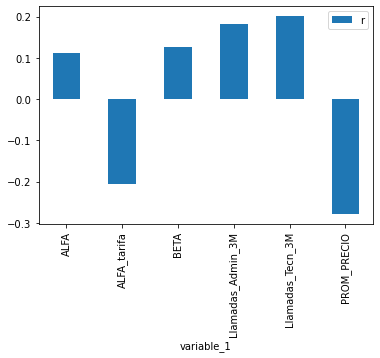

In [148]:
RV_nal_c0.set_index('variable_1').plot.bar()

In [149]:
DataSetEntregable_totales=RV_nal_c0.copy()

In [150]:
DataSetEntregable_totales=DataSetEntregable_totales.set_index('variable_1').T

### Correlaciones x Periodo

### Funcion correlaciones por periodo
* Recibe los datos y retorna data framames para graficar

In [151]:
def dic_corr_mes(data):
    res_corr_total_var=res_corr_total_var_nacional
    res_corr_total_raz=res_corr_total_raz_nacional
    dic_resultados={}
    
    for i in range(1,11):
        print(i)
        dic_aux={}
        data_aux=data[data['FECHA']==i]    
        corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
        corr_tab=tidy_corr_matrix(corr_matrix)
        corr_tab_bajas=corr_tab[corr_tab['variable_2']=='BAJAS_TOTAL'].drop(columns=['variable_2'])
        corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]    
        dic_aux['total']=corr_tab_bajas    
        corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
        corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
        corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
        corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
        corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]    
        dic_aux['razones']=corr_tab_razones
        dic_resultados[i]=dic_aux

    for i in range(1,11):
        print(i)
        aux_tab_var=dic_resultados_nacional_mes[i]['total'][dic_resultados_nacional_mes[i]['total']['variable_1'].isin(sel_variables_razones)]
        aux_tab_sel=dic_resultados_nacional_mes[i]['total'][dic_resultados_nacional_mes[i]['total']['variable_1'].isin(sel_variables_causas2)]
        aux_tab_var.drop(columns=['abs_r'],inplace=True)
        aux_tab_sel.drop(columns=['abs_r'],inplace=True)
        aux_tab_var.columns=['variable_1',str(i)+'_r']
        aux_tab_sel.columns=['variable_1',str(i)+'_r']    
        res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
        res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')
    
    res_corr_total_raz_T=res_corr_total_raz.T
    res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
    res_corr_total_raz_T = res_corr_total_raz_T.iloc[2:]   
    
    res_corr_total_var_T=res_corr_total_var.T
    res_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]
    res_corr_total_var_T = res_corr_total_var_T.iloc[1:]
    
    return res_corr_total_raz_T, res_corr_total_var_T
        

In [152]:
def dic_corr_mes_ind(data):
    res_corr_total_var=res_corr_total_var_nacional
    res_corr_total_raz=res_corr_total_raz_nacional
    dic_resultados={}
    
    for i in range(1,11):
        print(i)
        dic_aux={}
        data_aux=data[data['FECHA']==i]    
        corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
        corr_tab=tidy_corr_matrix(corr_matrix)
        corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
        corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]    
        dic_aux['total']=corr_tab_bajas    
        corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
        corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
        corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
        corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
        corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]    
        dic_aux['razones']=corr_tab_razones
        dic_resultados[i]=dic_aux

    for i in range(1,11):
        print(i)
        aux_tab_var=dic_resultados[i]['total'][dic_resultados[i]['total']['variable_1'].isin(sel_variables_razones)]
        aux_tab_sel=dic_resultados[i]['total'][dic_resultados[i]['total']['variable_1'].isin(sel_variables_causas2)]
        aux_tab_var.drop(columns=['abs_r'],inplace=True)
        aux_tab_sel.drop(columns=['abs_r'],inplace=True)
        aux_tab_var.columns=['variable_1',str(i)+'_r']
        aux_tab_sel.columns=['variable_1',str(i)+'_r']    
        res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
        res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')
    
    res_corr_total_raz_T=res_corr_total_raz.T
    res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
    res_corr_total_raz_T = res_corr_total_raz_T.iloc[2:]   
    
    res_corr_total_var_T=res_corr_total_var.T
    res_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]
    res_corr_total_var_T = res_corr_total_var_T.iloc[1:]
    
    return res_corr_total_raz_T, res_corr_total_var_T

In [153]:
(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_c0)

1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [154]:
res_corr_total_raz_T

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
1_r,0.294948,0.069951,-0.182076,0.147881,0.371098,-0.263755
2_r,0.420402,0.091637,0.180382,0.422025,0.210417,-0.381427
3_r,-0.003484,-0.289655,0.08808,0.09829,0.193154,-0.295681
4_r,0.010279,-0.244335,0.126089,0.335076,0.243765,-0.221061
5_r,-0.136504,-0.143367,-0.218062,0.281524,0.095274,-0.002269
6_r,0.029443,-0.656158,0.138319,0.430678,0.343026,-0.586905
7_r,0.018467,-0.327094,0.432947,0.316425,0.010576,-0.344462
8_r,0.368919,-0.246798,0.236862,0.187432,0.09771,0.058182
9_r,-0.230314,-0.221675,-0.179807,0.417713,0.228416,-0.232477
10_r,0.1723,-0.177833,0.212544,0.083867,0.14144,-0.202334


In [155]:
DataSetEntregable_totales_temp=res_corr_total_raz_T.copy()

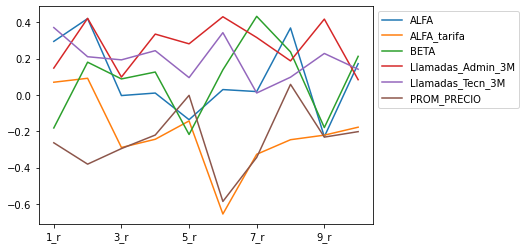

In [156]:
ax = res_corr_total_raz_T.plot.line()
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot(figsize=(20,10));

### Analisis Específicos

In [157]:
#data=data.merge(maestro_data, left_on=['COD_NODO'], right_on=['COD_NODO'], how='left')
data=data_c0.merge(maestro_data, left_on=['COD_NODO'], right_on=['COD_NODO'], how='left')

In [158]:
data.groupby('DIVISION')['BAJAS_TOTAL'].sum().to_frame().sort_values('BAJAS_TOTAL',ascending=False)

,BAJAS_TOTAL
DIVISION,
REGION CENTRO,856
REGION OCCIDENTE,580
REGION NOROCCIDENTE,396
REGION ORIENTE,146
REGION COSTA,90


In [159]:
data.groupby('DIVISION')['BAJAS_TOTAL'].sum().to_frame().sort_values('BAJAS_TOTAL',ascending=False)

,BAJAS_TOTAL
DIVISION,
REGION CENTRO,856
REGION OCCIDENTE,580
REGION NOROCCIDENTE,396
REGION ORIENTE,146
REGION COSTA,90


In [160]:
data.groupby('CIUDAD')['BAJAS_TOTAL'].sum().to_frame().sort_values('BAJAS_TOTAL',ascending=False).head(6)

,BAJAS_TOTAL
CIUDAD,
BOGOTA,808
CALI,350
MEDELLIN,120
JAMUNDI,112
PEREIRA,85
PASTO,69


In [161]:
data[data['CIUDAD']=='BOGOTA'].groupby('AREA')['BAJAS_TOTAL'].sum().to_frame().sort_values('BAJAS_TOTAL',ascending=False).head(10)

,BAJAS_TOTAL
AREA,
BOGOTA NORTE,253
BOGOTA ORIENTE,240
BOGOTA SUR,202
BOGOTA OCCIDENTE,113


### Analisis regionales

In [162]:
regionales=data['DIVISION'].unique()
regionales = [x for x in regionales if pd.notnull(x)]
regionales

['REGION CENTRO',
 'REGION COSTA',
 'REGION NOROCCIDENTE',
 'REGION ORIENTE',
 'REGION OCCIDENTE']

In [163]:
dic_resultados={}

In [164]:
for reg in regionales:
    print(reg)
    dic_aux={}
    data_aux=data[data['DIVISION']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    #corr_tab_bajas=corr_tab_bajas[corr_tab_bajas['abs_r']>=0.15].sort_values('r',ascending=False)
    dic_aux['total']=corr_tab_bajas
    #dic_resultados[reg]['total']=corr_tab_bajas
    corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    #corr_tab_razones[corr_tab_razones['abs_r']>=0.09].sort_values('r',ascending=False)
    dic_aux['razones']=corr_tab_razones
    dic_resultados[reg]=dic_aux

REGION CENTRO
REGION COSTA
REGION NOROCCIDENTE
REGION ORIENTE
REGION OCCIDENTE


In [165]:
res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in regionales:
    print(reg)
    aux_tab_var=dic_resultados[reg]['total'][dic_resultados[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados[reg]['total'][dic_resultados[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg+'_r']
    
    res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

REGION CENTRO
REGION COSTA
REGION NOROCCIDENTE
REGION ORIENTE
REGION OCCIDENTE


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [166]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]

In [167]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
r,0.110867,-0.205312,0.125575,0.18141,0.200421,-0.278238
REGION CENTRO_r,0.272644,-0.250056,0.244776,0.275055,0.177742,-0.296061
REGION COSTA_r,-0.052632,-0.381818,-0.166917,0.206015,0.634555,0.004511
REGION NOROCCIDENTE_r,-0.191529,-0.154722,-0.170525,0.045863,-0.009695,-0.208887
REGION ORIENTE_r,-0.262901,NaN,-0.287765,-0.06737,0.155288,-0.097016
REGION OCCIDENTE_r,0.182726,-0.247937,0.287551,0.136773,0.310645,-0.320081


In [168]:
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
r,0.110867,-0.205312,0.125575,0.18141,0.200421,-0.278238
REGION CENTRO_r,0.272644,-0.250056,0.244776,0.275055,0.177742,-0.296061
REGION COSTA_r,-0.052632,-0.381818,-0.166917,0.206015,0.634555,0.004511
REGION NOROCCIDENTE_r,-0.191529,-0.154722,-0.170525,0.045863,-0.009695,-0.208887
REGION ORIENTE_r,-0.262901,NaN,-0.287765,-0.06737,0.155288,-0.097016
REGION OCCIDENTE_r,0.182726,-0.247937,0.287551,0.136773,0.310645,-0.320081


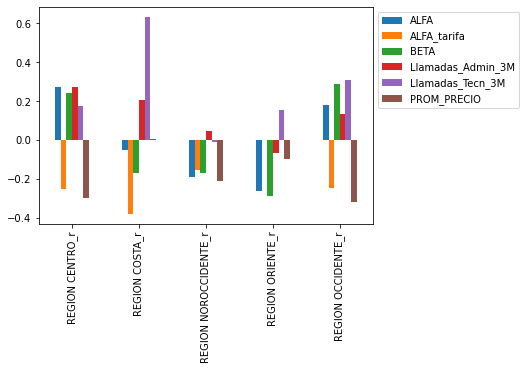

In [169]:
ax = res_corr_total_raz_T[1:].plot.bar()
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot(figsize=(30,20));

In [170]:
"""
res_corr_total_var_T=res_corr_total_var.T
res_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]
res_corr_total_var_T = res_corr_total_var_T.iloc[1:]

ax = res_corr_total_var_T.plot.bar()
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()"""

'\nres_corr_total_var_T=res_corr_total_var.T\nres_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]\nres_corr_total_var_T = res_corr_total_var_T.iloc[1:]\n\nax = res_corr_total_var_T.plot.bar()\nax.legend(bbox_to_anchor=(1.0, 1.0))\nax.plot()'

### Analisis Temporal_ ESPECIFICO

In [171]:
## guardar en tabla
for reg in regionales:
    data_aux=data[data['DIVISION']==reg]
    #())=dic_corr_mes_ind(data_aux)
    (res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [172]:
DataSetEntregable_totales_temp

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO,CATEGORIA
1_r,0.294948,0.069951,-0.182076,0.147881,0.371098,-0.263755,NaN
2_r,0.420402,0.091637,0.180382,0.422025,0.210417,-0.381427,NaN
3_r,-0.003484,-0.289655,0.08808,0.09829,0.193154,-0.295681,NaN
4_r,0.010279,-0.244335,0.126089,0.335076,0.243765,-0.221061,NaN
5_r,-0.136504,-0.143367,-0.218062,0.281524,0.095274,-0.002269,NaN
6_r,0.029443,-0.656158,0.138319,0.430678,0.343026,-0.586905,NaN
7_r,0.018467,-0.327094,0.432947,0.316425,0.010576,-0.344462,NaN
8_r,0.368919,-0.246798,0.236862,0.187432,0.09771,0.058182,NaN
9_r,-0.230314,-0.221675,-0.179807,0.417713,0.228416,-0.232477,NaN
10_r,0.1723,-0.177833,0.212544,0.083867,0.14144,-0.202334,NaN


In [173]:
#for reg in regionales:
#    hm_corr_graf(dic_resultados[reg]['razones'],reg)

## Ciudades

In [174]:
ciudades=data.groupby('CIUDAD')['BAJAS_TOTAL'].sum().to_frame().sort_values('BAJAS_TOTAL',ascending=False).head(6).index
ciudades

Index(['BOGOTA', 'CALI', 'MEDELLIN', 'JAMUNDI', 'PEREIRA', 'PASTO'], dtype='object', name='CIUDAD')

In [175]:
dic_resultados_ciudad={}

In [176]:
for reg in ciudades:
    print(reg)
    dic_aux={}
    data_aux=data[data['CIUDAD']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    #corr_tab_bajas=corr_tab_bajas[corr_tab_bajas['abs_r']>=0.15].sort_values('r',ascending=False)
    dic_aux['total']=corr_tab_bajas
    #dic_resultados[reg]['total']=corr_tab_bajas
    corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    #corr_tab_razones[corr_tab_razones['abs_r']>=0.09].sort_values('r',ascending=False)
    dic_aux['razones']=corr_tab_razones
    dic_resultados_ciudad[reg]=dic_aux

BOGOTA
CALI
MEDELLIN
JAMUNDI
PEREIRA
PASTO


In [177]:
res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in ciudades:
    print(reg)
    aux_tab_var=dic_resultados_ciudad[reg]['total'][dic_resultados_ciudad[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados_ciudad[reg]['total'][dic_resultados_ciudad[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg+'_r']
    
    res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

BOGOTA
CALI
MEDELLIN
JAMUNDI
PEREIRA
PASTO


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [178]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]

In [179]:
res_corr_total_raz_T

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
r,0.110867,-0.205312,0.125575,0.18141,0.200421,-0.278238
BOGOTA_r,0.272644,-0.250056,0.249871,0.308612,0.203147,-0.28646
CALI_r,0.455462,-0.329852,0.358271,0.080098,0.381004,-0.37383
MEDELLIN_r,-0.289583,-0.227905,-0.179015,0.102294,0.587146,0.187288
JAMUNDI_r,0.07943,NaN,0.046501,0.295917,0.174853,-0.131939
PEREIRA_r,0.044378,0.054135,-0.178947,0.239098,-0.141566,0.359398
PASTO_r,-0.551515,0.430303,0.248485,0.587879,0.509241,-0.272727


In [180]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
r,0.110867,-0.205312,0.125575,0.18141,0.200421,-0.278238
REGION CENTRO_r,0.272644,-0.250056,0.244776,0.275055,0.177742,-0.296061
REGION COSTA_r,-0.052632,-0.381818,-0.166917,0.206015,0.634555,0.004511
REGION NOROCCIDENTE_r,-0.191529,-0.154722,-0.170525,0.045863,-0.009695,-0.208887
REGION ORIENTE_r,-0.262901,NaN,-0.287765,-0.06737,0.155288,-0.097016
REGION OCCIDENTE_r,0.182726,-0.247937,0.287551,0.136773,0.310645,-0.320081
BOGOTA_r,0.272644,-0.250056,0.249871,0.308612,0.203147,-0.28646
CALI_r,0.455462,-0.329852,0.358271,0.080098,0.381004,-0.37383
MEDELLIN_r,-0.289583,-0.227905,-0.179015,0.102294,0.587146,0.187288
JAMUNDI_r,0.07943,NaN,0.046501,0.295917,0.174853,-0.131939


[]

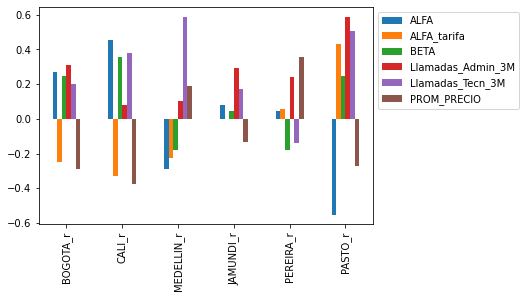

In [181]:
ax = res_corr_total_raz_T[1:].plot.bar()
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

In [182]:
"""
res_corr_total_var_T=res_corr_total_var.T
res_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]
res_corr_total_var_T = res_corr_total_var_T.iloc[1:]

ax = res_corr_total_var_T.plot.bar()
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()"""

'\nres_corr_total_var_T=res_corr_total_var.T\nres_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]\nres_corr_total_var_T = res_corr_total_var_T.iloc[1:]\n\nax = res_corr_total_var_T.plot.bar()\nax.legend(bbox_to_anchor=(1.0, 1.0))\nax.plot()'

In [183]:
#for reg in ciudades:
#    hm_corr_graf(dic_resultados_ciudad[reg]['razones'],reg)

### Analisis temporal

In [184]:
## guardar en tabla
for reg in ciudades:
    data_aux=data[data['CIUDAD']==reg]  
    #())=dic_corr_mes_ind(data_aux)
    (res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


9
10
1
2
3
4
5
6
7
8
9
10


In [185]:
DataSetEntregable_totales_temp

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO,CATEGORIA
1_r,0.294948,0.069951,-0.182076,0.147881,0.371098,-0.263755,NaN
2_r,0.420402,0.091637,0.180382,0.422025,0.210417,-0.381427,NaN
3_r,-0.003484,-0.289655,0.08808,0.09829,0.193154,-0.295681,NaN
4_r,0.010279,-0.244335,0.126089,0.335076,0.243765,-0.221061,NaN
5_r,-0.136504,-0.143367,-0.218062,0.281524,0.095274,-0.002269,NaN
...,...,...,...,...,...,...,...
6_r,NaN,NaN,NaN,NaN,NaN,NaN,PASTO
7_r,NaN,NaN,NaN,NaN,NaN,NaN,PASTO
8_r,NaN,NaN,NaN,NaN,NaN,NaN,PASTO
9_r,NaN,NaN,NaN,NaN,NaN,NaN,PASTO


### Bogotá

In [186]:
sectoresBog=data[data['CIUDAD']=='BOGOTA']['AREA'].unique()

In [187]:
dic_resultados_Bogota={}

In [188]:
for reg in sectoresBog:
    print(reg)
    dic_aux={}
    data_aux=data[data['AREA']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    #corr_tab_bajas=corr_tab_bajas[corr_tab_bajas['abs_r']>=0.15].sort_values('r',ascending=False)
    dic_aux['total']=corr_tab_bajas
    #dic_resultados[reg]['total']=corr_tab_bajas
    corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    #corr_tab_razones[corr_tab_razones['abs_r']>=0.09].sort_values('r',ascending=False)
    dic_aux['razones']=corr_tab_razones
    dic_resultados_Bogota[reg]=dic_aux

BOGOTA NORTE
BOGOTA ORIENTE
BOGOTA SUR
BOGOTA OCCIDENTE


In [189]:
res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in sectoresBog:
    print(reg)
    aux_tab_var=dic_resultados_Bogota[reg]['total'][dic_resultados_Bogota[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados_Bogota[reg]['total'][dic_resultados_Bogota[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg+'_r']
    
    res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

BOGOTA NORTE
BOGOTA ORIENTE
BOGOTA SUR
BOGOTA OCCIDENTE


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


[]

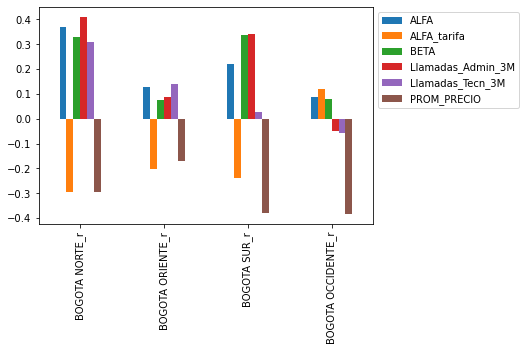

In [190]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]
ax = res_corr_total_raz_T[1:].plot.bar()
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

In [191]:
res_corr_total_raz_T[1:]

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
BOGOTA NORTE_r,0.368496,-0.293975,0.330596,0.410953,0.311014,-0.293697
BOGOTA ORIENTE_r,0.129709,-0.202075,0.075682,0.08567,0.137985,-0.169996
BOGOTA SUR_r,0.21898,-0.238202,0.335773,0.339713,0.027739,-0.381086
BOGOTA OCCIDENTE_r,0.087218,0.120301,0.078087,-0.05139,-0.059325,-0.385539


In [192]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO
r,0.110867,-0.205312,0.125575,0.18141,0.200421,-0.278238
REGION CENTRO_r,0.272644,-0.250056,0.244776,0.275055,0.177742,-0.296061
REGION COSTA_r,-0.052632,-0.381818,-0.166917,0.206015,0.634555,0.004511
REGION NOROCCIDENTE_r,-0.191529,-0.154722,-0.170525,0.045863,-0.009695,-0.208887
REGION ORIENTE_r,-0.262901,NaN,-0.287765,-0.06737,0.155288,-0.097016
REGION OCCIDENTE_r,0.182726,-0.247937,0.287551,0.136773,0.310645,-0.320081
BOGOTA_r,0.272644,-0.250056,0.249871,0.308612,0.203147,-0.28646
CALI_r,0.455462,-0.329852,0.358271,0.080098,0.381004,-0.37383
MEDELLIN_r,-0.289583,-0.227905,-0.179015,0.102294,0.587146,0.187288
JAMUNDI_r,0.07943,NaN,0.046501,0.295917,0.174853,-0.131939


In [193]:
"""
res_corr_total_var_T=res_corr_total_var.T
res_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]
res_corr_total_var_T = res_corr_total_var_T.iloc[1:]

ax = res_corr_total_var_T.plot.bar()
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()"""

'\nres_corr_total_var_T=res_corr_total_var.T\nres_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]\nres_corr_total_var_T = res_corr_total_var_T.iloc[1:]\n\nax = res_corr_total_var_T.plot.bar()\nax.legend(bbox_to_anchor=(1.0, 1.0))\nax.plot()'

In [194]:
#for reg in sectoresBog:
#    hm_corr_graf(dic_resultados_Bogota[reg]['razones'],reg)

In [195]:
### Guardar Archivo
DataSetEntregable_totales.to_csv('CorrelacionesAgrupadas_14Dic.csv',sep=';')

### Temporales

In [196]:
## guardar en tabla
for reg in sectoresBog:
    data_aux=data[data['AREA']==reg]  
    #())=dic_corr_mes_ind(data_aux)
    (res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [197]:
DataSetEntregable_totales_temp.to_csv('CorrelacionesTemporales_14Dic.csv',sep=';')

### Regresión multilineal

* Reescalado
* Modelos

In [198]:
DataSetEntregable_totales_reg=pd.DataFrame()

In [199]:
DataSetEntregable_totales_temp_reg=pd.DataFrame()

In [200]:
data_reg=data_c0.copy()

In [201]:
data_reg.set_index('COD_NODO',inplace=True)

In [202]:
data_reg

,FECHA,CANT_USER,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,...,ind_churn,nMeses,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO,ALFA_val,BETA_val
COD_NODO,,,,,,,,,,,,,,,,,,,,,
15B2,1,412.0,1,0,0,0,0,0,1,1,...,0.009709,10,0.938404,0.702134,0.767620,0.009102,0.001214,2275.920000,0,0
15B2,2,417.0,0,1,1,0,0,0,0,0,...,0.007194,10,0.535036,0.703853,0.840322,0.013589,0.011990,2270.360000,0,0
15B2,3,416.0,1,0,1,0,0,0,1,0,...,0.007212,10,0.748191,0.707136,0.500241,0.012821,0.002404,2209.294118,0,0
15B2,4,418.0,2,1,0,0,0,2,0,0,...,0.014354,10,0.801659,0.710418,0.952036,0.007974,0.003987,1479.855263,0,0
15B2,5,420.0,0,0,0,0,0,2,0,0,...,0.009524,10,0.724961,0.993829,1.097072,0.008333,0.001190,1456.423077,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VRR,6,521.0,0,0,2,0,1,1,0,0,...,0.015355,10,0.859250,NaN,0.955240,0.004079,0.001679,2446.200000,0,0
VRR,7,531.0,1,0,0,0,0,0,0,0,...,0.009416,10,0.580991,NaN,0.957609,0.004896,0.000753,1590.396226,0,0
VRR,8,532.0,0,0,3,0,0,0,0,0,...,0.009398,10,0.685725,NaN,1.735614,0.004887,0.000376,1324.032258,0,0


In [203]:
data_reg=data_reg[sel_variables_causas2+['ind_churn','FECHA']]

In [204]:
data_reg.isnull().sum()/len(data_reg)

ALFA_tarifa          0.309524
ALFA                 0.023810
BETA                 0.000000
Llamadas_Admin_3M    0.000000
Llamadas_Tecn_3M     0.000000
PROM_PRECIO          0.000000
ind_churn            0.000000
FECHA                0.000000
dtype: float64

In [205]:
data_reg=data_reg.dropna()

In [206]:
colums_reg=list(data_reg.columns)

In [207]:
colums_reg.remove('FECHA')

In [208]:
colums_reg.remove('PROM_PRECIO')

In [209]:
colums_reg

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'ind_churn']

In [210]:
for col in colums_reg:
    data_reg[col]=np.log1p(data_reg[col])

In [211]:
## Escalar
#cols=data_reg.columns
scaler = MinMaxScaler()
data_reg[colums_reg]= scaler.fit_transform(data_reg[colums_reg])

In [212]:
colums_reg.remove('ind_churn')

In [213]:
colums_reg

['ALFA_tarifa', 'ALFA', 'BETA', 'Llamadas_Admin_3M', 'Llamadas_Tecn_3M']

### Nacional

In [214]:
# Dividir en X y X
y_train = data_reg['ind_churn']
X_train =  data_reg[colums_reg]

In [215]:
#Modelos
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ind_churn   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     8.615
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           1.29e-07
Time:                        22:09:59   Log-Likelihood:                 191.80
No. Observations:                 290   AIC:                            -371.6
Df Residuals:                     284   BIC:                            -349.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1613      0.032      4.996      0.000       0.098       0.225
ALFA_tarifa          -0.1114      0.038     -2.964      0.003      -0.185      -0.037
ALFA                  0.0557      0.043      1.302      0.194      -0.029       0.140
BETA                  0.0950      0.045      2.134      0.034       0.007       0.183
Llamadas_Admin_3M     0.1973      0.056      3.536      0.000       0.087       0.307
Llamadas_Tecn_3M     -0.0365      0.052     -0.704      0.482      -0.138       0.065
==============================================================================
Omnibus:                      140.735   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              936.904
Skew:                           1.872   Prob(JB):                    3.58e-204
Kurtosis:                      10.969   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [216]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,BETA,6.93
1,ALFA,5.81
0,ALFA_tarifa,3.29
3,Llamadas_Admin_3M,2.89
4,Llamadas_Tecn_3M,1.77


In [217]:
df_coef_nal=lr_1.params.to_frame()
df_coef_nal.columns=['coefs']

<AxesSubplot:>

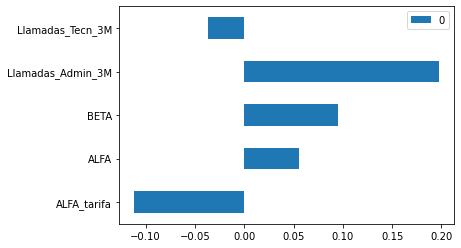

In [218]:
lr_1.params.to_frame()[1:].plot.barh()

In [219]:
df_coef_nal

,coefs
const,0.161321
ALFA_tarifa,-0.111440
ALFA,0.055732
BETA,0.095039
Llamadas_Admin_3M,0.197348
Llamadas_Tecn_3M,-0.036470


In [220]:
df_vif_nal=vif

In [221]:
DataSetEntregable_totales_reg=df_coef_nal.copy()

In [222]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg[1:].T
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M
coefs,-0.11144,0.055732,0.095039,0.197348,-0.03647


## Regresión en el tiempo

In [223]:
data_reg

,ALFA_tarifa,ALFA,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PROM_PRECIO,ind_churn,FECHA
COD_NODO,,,,,,,,
15B2,0.164413,0.367843,0.226817,0.131506,0.070950,2275.920000,0.121659,1
15B2,0.166699,0.237872,0.265604,0.208914,0.697250,2270.360000,0.084387,2
15B2,0.171057,0.310307,0.068990,0.195679,0.140453,2209.294118,0.084644,3
15B2,0.175406,0.327089,0.322315,0.112002,0.232784,1479.855263,0.190274,4
15B2,0.522572,0.302855,0.391282,0.118212,0.069600,1456.423077,0.118921,5
...,...,...,...,...,...,...,...,...
VLL1,0.644402,0.275349,0.143492,0.034749,0.000000,2771.062500,0.029773,6
VLL1,0.814422,0.294233,0.377831,0.054856,0.068379,1648.703704,0.133758,7
VLL1,0.702846,0.340809,0.478563,0.167861,0.050408,1431.919355,0.182005,8


In [224]:
def dic_reg_mes_ind(data_reg):
    df_coef=df_coef_nal
    df_vif=df_vif_nal
    dic_resultados={}
    
    for i in range(1,11):
        dic_aux={}
        data_aux=data_reg[data_reg['FECHA']==i] 
        data_aux.drop(columns=['FECHA'],inplace=True)
        #data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
        
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux    
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados[i]=dic_aux
    
    for i in range(1,11):
        print(i)

        aux_tab_coef=dic_resultados[i]['coef']
        aux_tab_vif=dic_resultados[i]['vif']

        aux_tab_coef.columns=[str(i)+'_coef']
        aux_tab_vif.columns=['Features',str(i)+'_vif']

        df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
        df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

    return df_coef, df_vif

In [225]:
(df_coef, df_vif)=dic_reg_mes_ind(data_reg)

1
2
3
4
5
6
7
8
9
10


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [226]:
df_coef

,coefs,1_coef,2_coef,3_coef,4_coef,5_coef,6_coef,7_coef,8_coef,9_coef,10_coef
const,0.161321,0.028187,0.304063,0.339590,0.164741,0.108882,0.407122,0.295501,-0.119074,0.646616,0.362991
ALFA_tarifa,-0.111440,0.011968,0.079393,-0.049981,-0.098740,-0.134782,-0.243540,-0.167784,0.084779,-0.145422,0.015936
ALFA,0.055732,0.399756,0.139730,-0.019594,0.011609,0.044190,0.009741,-0.059541,0.327263,-0.023777,0.059561
BETA,0.095039,-0.192087,0.136365,0.069533,0.014975,0.079160,0.037471,0.173108,0.154605,-0.334659,0.074010
Llamadas_Admin_3M,0.197348,0.218892,0.437542,0.301250,0.198646,0.528671,0.308953,-0.033416,-0.157998,0.022180,-0.283056
Llamadas_Tecn_3M,-0.036470,0.287476,-0.091259,0.048605,-0.144658,-0.260347,-0.106640,-0.092636,0.544682,0.014840,0.066089


In [227]:
df_coef_T=df_coef.T
df_coef_T.pop('const')
df_coef_T=df_coef_T[1:]
df_coef_T

,ALFA_tarifa,ALFA,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M
1_coef,0.011968,0.399756,-0.192087,0.218892,0.287476
2_coef,0.079393,0.139730,0.136365,0.437542,-0.091259
3_coef,-0.049981,-0.019594,0.069533,0.301250,0.048605
4_coef,-0.098740,0.011609,0.014975,0.198646,-0.144658
5_coef,-0.134782,0.044190,0.079160,0.528671,-0.260347
6_coef,-0.243540,0.009741,0.037471,0.308953,-0.106640
7_coef,-0.167784,-0.059541,0.173108,-0.033416,-0.092636
8_coef,0.084779,0.327263,0.154605,-0.157998,0.544682
9_coef,-0.145422,-0.023777,-0.334659,0.022180,0.014840
10_coef,0.015936,0.059561,0.074010,-0.283056,0.066089


In [228]:
DataSetEntregable_totales_temp_reg=df_coef_T.copy()

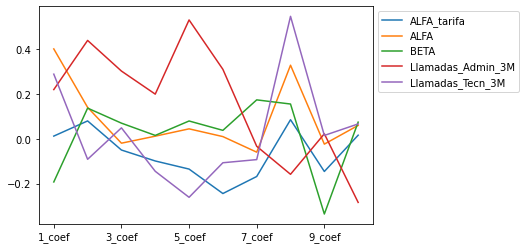

In [229]:
ax = df_coef_T.plot.line()
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot(figsize=(20,10));

## Analisis Específicos

In [230]:
data_reg_nor=data_reg.copy()

In [231]:
data_reg_nor=data_reg_nor.merge(maestro_data, left_index=True, right_on=['COD_NODO'], how='left')
data_reg_nor.set_index('COD_NODO', inplace=True)

In [232]:
data_reg_nor_temp=data_reg_nor.copy()

In [233]:
data_reg_nor.pop('FECHA')

COD_NODO
15B2     1
15B2     2
15B2     3
15B2     4
15B2     5
        ..
VLL1     6
VLL1     7
VLL1     8
VLL1     9
VLL1    10
Name: FECHA, Length: 290, dtype: int64

## Regional

In [234]:
dic_resultados_reg={}

In [235]:
for reg in regionales:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['DIVISION']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    y_train = data_aux.pop('ind_churn')
    X_train = data_aux    
    #Modelos
    X_train_lm = sm.add_constant(X_train)
    lr_1 = sm.OLS(y_train, X_train_lm).fit()    
    dic_aux['coef']=lr_1.params.to_frame()
    dic_aux['coef'].columns=['coefs']
    # Cálculo VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    dic_aux['vif']=vif
    dic_resultados[reg]=dic_aux

REGION CENTRO
REGION COSTA
REGION NOROCCIDENTE
REGION ORIENTE


ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in regionales:
    print(reg)
    
    aux_tab_coef=dic_resultados[reg]['coef']
    aux_tab_vif=dic_resultados[reg]['vif']
    
    aux_tab_coef.columns=[reg+'_coef']
    aux_tab_vif.columns=['Features',reg+'_vif']
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

In [ ]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])

In [ ]:
df_coef_T

In [ ]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

In [ ]:
ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot(figsize=(20,10));

####  Analisis temporal

In [ ]:
for reg in regionales:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['DIVISION']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)    

In [ ]:
DataSetEntregable_totales_temp_reg

## Ciudades

In [ ]:
dic_resultados_ciudad_reg={}
for reg in ciudades:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['CIUDAD']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_ciudad_reg[reg]=dic_aux

In [ ]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_ciudad_reg:
    print(reg)    
    aux_tab_coef=dic_resultados_ciudad_reg[reg]['coef']
    aux_tab_vif=dic_resultados_ciudad_reg[reg]['vif']
    
    aux_tab_coef.columns=[reg+'_coef']
    aux_tab_vif.columns=['Features',reg+'_vif']
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

In [ ]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot(figsize=(20,10));

In [ ]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T)
DataSetEntregable_totales_reg

#### Analisis temporal

In [ ]:
for reg in ciudades:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['CIUDAD']==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)

In [ ]:
DataSetEntregable_totales_temp_reg

## Bogota

In [ ]:
dic_resultados_Bogota={}
for reg in sectoresBog:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['AREA']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_Bogota[reg]=dic_aux

In [ ]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_Bogota:
    print(reg)    
    aux_tab_coef=dic_resultados_Bogota[reg]['coef']
    aux_tab_vif=dic_resultados_Bogota[reg]['vif']
    
    aux_tab_coef.columns=[reg+'_coef']
    aux_tab_vif.columns=['Features',reg+'_vif']
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

In [ ]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot(figsize=(20,10));

In [ ]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

### Analisis Temporal

In [ ]:
for reg in sectoresBog:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['AREA']==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)

In [ ]:
DataSetEntregable_totales_temp_reg

In [ ]:
### Guardar Archivo

In [ ]:
DataSetEntregable_totales_reg.to_csv('RegresionesAgrupadas_14Dic.csv',sep=';')

In [ ]:
DataSetEntregable_totales_temp_reg.to_csv('RegresionesTemporales_14Dic.csv',sep=';')